# BLOCKWISE: Wrangling the LOCATION_CRIME VIEW IN POSTGRES

## Exploratory Analysis with ```Pandas```

You may also find these resources helpful:  
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/
https://chrisalbon.com/python/pandas_dataframe_descriptive_stats.html

The Titanic Notebook has been only partially edited to reflect our Safety Recommender capstone project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

%matplotlib inline

I use the location_crime View in postgres below.  The location_crime view functions just like a postres table by executing the following SQL query:

 SELECT l.business_name,
    l.address,
    c.block,
    c.offense,
    c.offense_group,
    c.ucrrank,
    c.year,
    c.report_date
   FROM blockadvisor_location l
     JOIN blockadvisor_crime c ON l.street_name = c.block_street_name
  WHERE l.street_number >= c.block_street_number_begin AND l.street_number <= c.block_street_number_end
  ORDER BY l.business_name, c.offense, c.report_date DESC;

I join the location and crime data on the street name and use the WHERE clause to match the location address to the crime data for the block covering the right street number range.  

Note: The urrank refers to the following: The Uniform Crime Reports (UCR) compiles official data on crime in the United States, published by the Federal Bureau of Investigation (FBI). UCR is "a nationwide, cooperative statistical effort of nearly 18,000 city, university and college, county, state, tribal, and federal law enforcement agencies voluntarily reporting data on crimes brought to their attention". I did not yet discover what the rank means. The information I found initially just cautioned against ranking.

In [13]:
conn_str = "host={} dbname={} user={} password={}".format('localhost', 'blockwise', 'postgres', 'purplerain')
conn = psycopg2.connect(conn_str)
df = pd.read_sql_query('select * from "location_crime"',conn)

## Exploring the Data

=> Use ```pandas``` to view the "head" of the file with the first 10 rows.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [14]:
# Use pandas to view the first 10 rows of the file.
df.head(100)

,business_name,address,block,offense,offense_group,method,ucrrank,year,report_date
0,All Purpose,79 Potomac Ave SE,1 - 99 block of potomac avenue se,theft f/auto,property,others,7,2017,2017-05-13T19:33:05.000Z
1,All Purpose,79 Potomac Ave SE,1 - 99 block of potomac avenue se,theft/other,property,others,6,2017,2017-05-27T16:28:52.000Z
2,Ambar,523 8th St SE,500 - 699 block of 8th street se,assault w/dangerous weapon,violent,knife,3,2016,2016-07-03T16:18:18.000Z
3,Ambar,523 8th St SE,500 - 699 block of 8th street se,burglary,property,others,5,2017,2017-10-12T16:44:42.000Z
4,Ambar,523 8th St SE,500 - 699 block of 8th street se,burglary,property,others,5,2017,2017-02-04T17:39:32.000Z
5,Ambar,523 8th St SE,500 - 699 block of 8th street se,burglary,property,others,5,2016,2016-11-21T17:06:38.000Z
6,Ambar,523 8th St SE,500 - 699 block of 8th street se,burglary,property,others,5,2016,2016-09-21T17:48:05.000Z
7,Ambar,523 8th St SE,500 - 699 block of 8th street se,burglary,property,others,5,2016,2016-05-30T18:35:40.000Z
8,Ambar,523 8th St SE,1 - 99 block of 8th street se,motor vehicle theft,property,others,8,2016,2016-10-05T21:15:40.000Z
9,Ambar,523 8th St SE,500 - 699 block of 8th street se,motor vehicle theft,property,others,8,2016,2016-08-17T22:06:14.000Z


*What did you see? When exploring a new data set, these are some of the first questions you should try to answer.*
 * Are there any missing values?
 * What kinds of values/numbers/text are there?
 * Are the values continuous or categorical?
 * Are some variables more sparse than others?
 * Are there multiple values in a single column?

#### Summary Statistics

__=>__ Use ```pandas``` to get summary statistics on the numerical fields in the data.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [6]:
# Use pandas to get the summary statistics on the data.

df.describe()

,business_name,address,block,offense,offense_group,method,ucrrank,year,report_date
count,2241,2241,2241,2241,2241,2241,2241,2241,2241
unique,47,46,64,8,2,3,8,3,2122
top,Clyde's of Georgetown,3236 M St NW,3200 - 3275 block of m street nw,theft/other,property,others,6,2017,2017-05-06T20:30:08.000Z
freq,303,303,297,1482,2069,2184,1482,1144,3


*What can we infer from the summary statistics?*
 * How many missing values does the ```Age``` column have?
 * What percentage of the passengers survived?
 * How many passengers traveled in Class 3?
 * Are there any outliers in the ```Fare``` column?

__=>__ Use ```pandas``` to get the median of the ```Age``` column.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

In [7]:
# Use pandas to get the median of the Age column. DataFrame.median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)[source]
df['ucrrank'].median()

6.0

__=>__ Use ```pandas``` to find the number of unique values in the ```Ticket``` column.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html

In [7]:
# Use pandas to find the number of unique values in the Ticket column. Series.nunique(dropna=True)[source]¶
df['year'].nunique()
#df.dtypes

3

The ```Ticket``` column has a large number of unique values. As we saw above in our initial exploration of the data, this feature includes a combination of text and numerical data. Therefore, let's use ```value_counts()``` to generate a frequency distribution of the ```Ticket``` values, so we can see whether this data will be useful for our models.

__=>__ Use ```pandas``` to count the number of each unique value in the ```Ticket``` column.

Documentation: http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.Series.value_counts.html

In [8]:
# Use pandas to count the number of each unique Ticket value.
df['ucrrank'].value_counts()

6    1482
7     443
4      91
5      83
3      66
8      61
2      14
1       1
Name: ucrrank, dtype: int64

## Visualize the Data
Now let's look at two histograms of the ```Fare``` data. In the first, we'll set ```bins=10``` and in the second ```bin=50```. Which one do you find the most helpful? What are you able to tell about the range of fares paid by the passengers from the histograms?

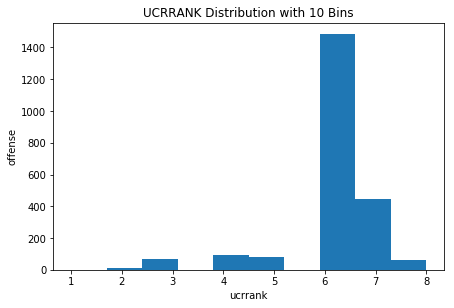

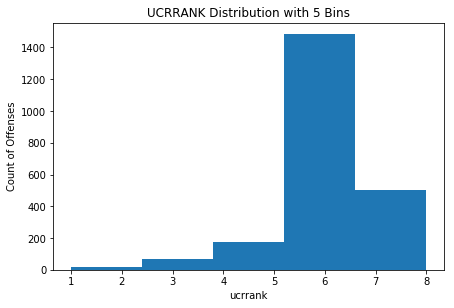

In [9]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['ucrrank'], bins=10, range=(df['ucrrank'].min(),df['ucrrank'].max()))
plt.title('UCRRANK Distribution with 10 Bins')
plt.xlabel('ucrrank')
plt.ylabel('offense')
plt.show()

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['ucrrank'], bins=5, range=(df['ucrrank'].min(),df['ucrrank'].max()))
plt.title('UCRRANK Distribution with 5 Bins')
plt.xlabel('ucrrank')
plt.ylabel('Count of Offenses')
plt.show()

## Data Wrangling
It's important to wrangle your data before building your models, since ```scikit-learn``` cannot process missing values and only accepts numerical data. Outliers should also be dealt with beforehand, since they will negatively impact the performance of most machine learning models. 

### Outliers
When examining the histograms of the ```Fare``` data, did you notice any potential outliers? Since there is a relationship between the cost of a ticket and the class the passenger was traveling in, let's look at a box plot of this data to investigate further. 

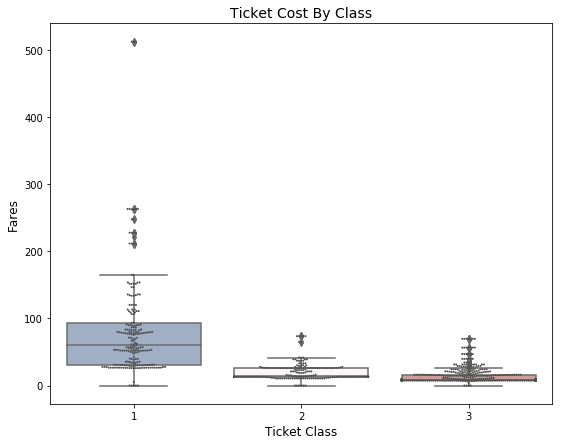

In [34]:
f, ax = plt.subplots(figsize=(9,7))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='vlag')
sns.swarmplot(x='Pclass', y='Fare', data=df, size=2, color='0.3')
plt.title('Ticket Cost By Class', size=14)
plt.xlabel('Ticket Class', size=12)
plt.ylabel('Fares', size=12)
plt.show()

We can quickly see that there a few first-class fares that are much higher than the others. Let's sort the data set by the ```Fare``` column so we can see the cost of the most expensive tickets.

In [10]:
df.sort_values(by='ucrrank', ascending=False).head(5)

,business_name,address,block,offense,offense_group,method,ucrrank,year,report_date
1885,The Fainting Goat,1330 U St NW,1300 - 1399 block of u street nw,motor vehicle theft,property,others,8,2016,2016-08-31T21:14:36.000Z
321,CIRCA at Chinatown,781 7th St NW,700 - 799 block of 7th street nw,motor vehicle theft,property,others,8,2017,2017-07-27T17:40:20.000Z
1881,The Fainting Goat,1330 U St NW,100 - 142 block of u street nw,motor vehicle theft,property,others,8,2018,2018-01-07T16:23:06.000Z
1882,The Fainting Goat,1330 U St NW,1300 - 1399 block of u street nw,motor vehicle theft,property,others,8,2017,2017-09-18T20:06:21.000Z
1883,The Fainting Goat,1330 U St NW,1300 - 1399 block of u street nw,motor vehicle theft,property,others,8,2017,2017-08-13T08:31:35.000Z


Since the ```$512``` fares appear to be outliers, let's replace them with ```$213```, since it is the second highest value and much closer to the other data points.

In [12]:
for idx in df.index:
    if df.loc[idx].ucrrank > 5:
        df.set_value(idx, 'ucrrank', 263.0000)

TypeError: '>' not supported between instances of 'str' and 'int'

### Dealing with Missing Data
When deciding how to handle missing values, it is important to know how prevalent they are in your data. Let's use ```pandas``` to find out how many ```Cabin``` values are missing from our data set.

__=>__ Use ```pandas``` to get the sum of all the null values in the ```Cabin``` column.

Documentation:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html

In [ ]:
# Sum the number of null Cabin values.

### Deleting a Feature


__=>__ Since most of the ```Cabin``` values are missing, let's use ```pandas``` to drop the column. We will also drop the ```Ticket``` column, since as we saw earlier, it contains of a mix of text and numeric data that doesn't appear to contain any useful information. *HINT: remember to set ```axis=1```.*

Documentation:  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html  
https://chrisalbon.com/python/pandas_dropping_column_and_rows.html

In [ ]:
# Use pandas to drop the Cabin and Ticket columns.

### Filling in Missing Data
While the ```Age``` column also contains null values, it is missing far fewer than the ```Cabin``` column, so we will fill those in rather than drop the column. The simplest approach, which we'll use here, is to replace the null values with the mean age of the passengers.

__=>__ First use ```pandas``` to calculate and save the mean age of the passengers. Then replace the null values in the ```Age``` column with that number.

Documentation:  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html     
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

In [13]:
# First, use pandas to find the mean age of the passengers: mean_age
mean_age = df['year']

# ...and then fill in the null Age values with mean_age.

In [ ]:
# Check that there are no more null values in the Age column.

### Save Your Work
...you will need it in a few weeks!

In [ ]:
import pandas.io.sql as pd_sql
import sqlite3 as sql

# Create a sqlite3 database to store the data.
con = sql.connect('titanic.db') 

__=>__ Use ```pandas``` to write your ```DataFrame``` to the ```sqlite``` database.

Documenation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html

In [ ]:
# Use pandas to save your dataframe to a sqlite database name 'training_data'.